# ASSORBIMENTO PbS 2000

Misura dell'assorbimento del PbS 2000 in tre diverse concentrazioni

In [7]:
concentrazioni = ['0e1mg_ml', '1mg_ml', '5mg_ml']

Fare caso al fatto che fit_N_gaussiane prende in argomento il numero di acquisizioni! Il motivo è spiegato bene nella docstring. In breve: serve a correggere con un senso l'errore poissoniano!

## Importazioni

In [1]:
from qp2_subroutines import *
import os
# per importare da sibling folder
import sys
sys.path.append("../QM2")
from varshni_subroutines import lambda_to_E

In [2]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

Nomi dei file

In [3]:
def build_name_PbS_abs (conc: str = None):
    # t_acq == 0e25
    # n_acq == 5
    # grating == 35lmm
    # ecc ==1064
    # filtro == 0e5pc
    
    cartella = 'data/PbS2000_assorbimento/'
    name = 'QD_PbS2000_' + conc + '_Abs.txt'
    
    return cartella+name

In [4]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

---

---

# Analisi

## ASSORBIMENTO PbS su CONCENTRAZIONE

#### Contenitore per i dati

In [5]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

PbS_T = {}

#### Lettura file

In [6]:
for conc in concentrazioni:
    
    # Costruisco nome file
    name = build_name_PbS_abs (conc=conc)
    # Estraggo i dati 
    waveln, counts = leggi_file_assorbimento (name)
    # Pulisco i counts da valori insensati
    #counts = clean_counts_assorbimento (counts, n=1, n_primi=100, n_ultimi=100)
    # Raccolgo
    PbS_T[conc] = (waveln, counts)

NameError: name 'concentrazioni' is not defined

#### Plot su concentrazione

Per il fit è sufficiente un fit gaussiano in ciascuna regione interessata:

In [ ]:
regioni = [(1280,1390), (1460,1600), (1930,2090)]

In [ ]:
# per un giochino sul cambio lampada tra 1600 e 1800
oplà = [0.0004, 0.01, 0.095]

• Gaussiana  1
 - A = 0.0023427626025676806
 - mu = 1319.1446972610931
 - sigma = 70.41427807385422
 - chi2rid = 0.000705941768004571
• Gaussiana  2
 - A = 0.0024451664367095417
 - mu = 1516.5588057921314
 - sigma = 89.2725759410323
 - chi2rid = 0.0003220321353032011
• Gaussiana  3
 - A = 0.0026821743875663686
 - mu = 1989.8645556382257
 - sigma = 41.52043392393061
 - chi2rid = 0.00037720440804363747


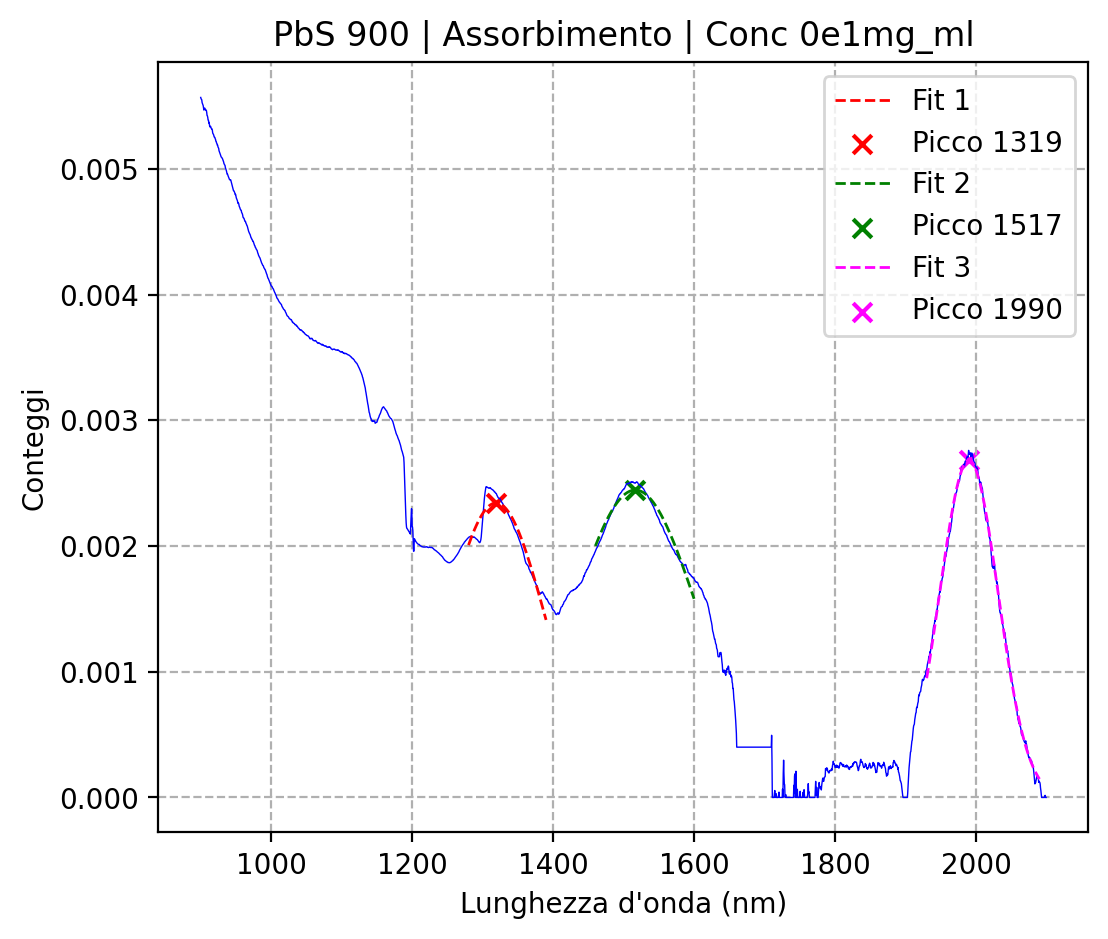

• Gaussiana  1
 - A = 0.030009720485428285
 - mu = 1316.2350012603133
 - sigma = 91.1119110265331
 - chi2rid = 0.0004302688090592143
• Gaussiana  2
 - A = 0.03009652538122169
 - mu = 1528.0414054577611
 - sigma = 78.64492681617945
 - chi2rid = 0.0018241098270455464
• Gaussiana  3
 - A = 0.035005635375038584
 - mu = 2006.3368018798747
 - sigma = 43.35065319270199
 - chi2rid = 0.009848651657515896


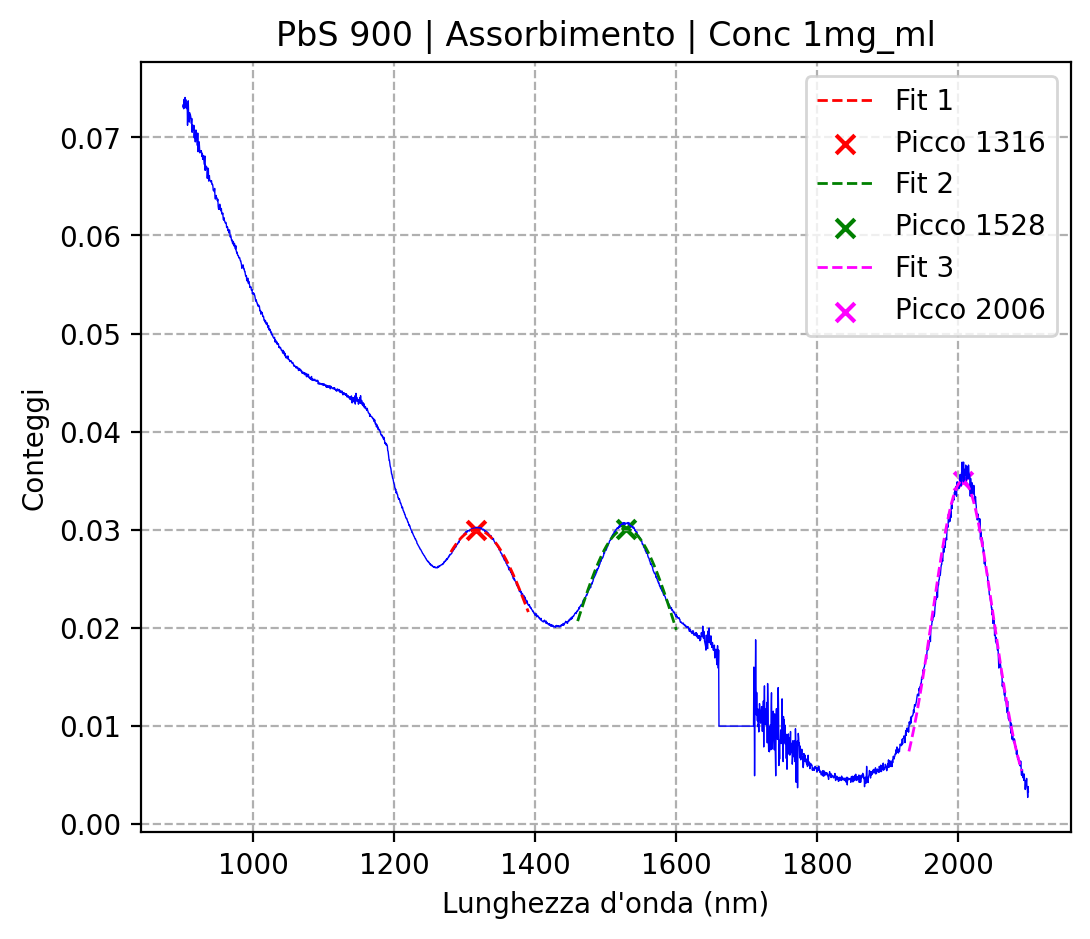

• Gaussiana  1
 - A = 0.16435254366564367
 - mu = 1316.6765077804619
 - sigma = 101.90048616161177
 - chi2rid = 0.0008753695191483417
• Gaussiana  2
 - A = 0.1623313433949937
 - mu = 1532.2985257607916
 - sigma = 84.88226134588196
 - chi2rid = 0.007148579588313312
• Gaussiana  3
 - A = 0.17709216744253983
 - mu = 2010.2813235236288
 - sigma = 46.19293833522191
 - chi2rid = 0.06768248929504334


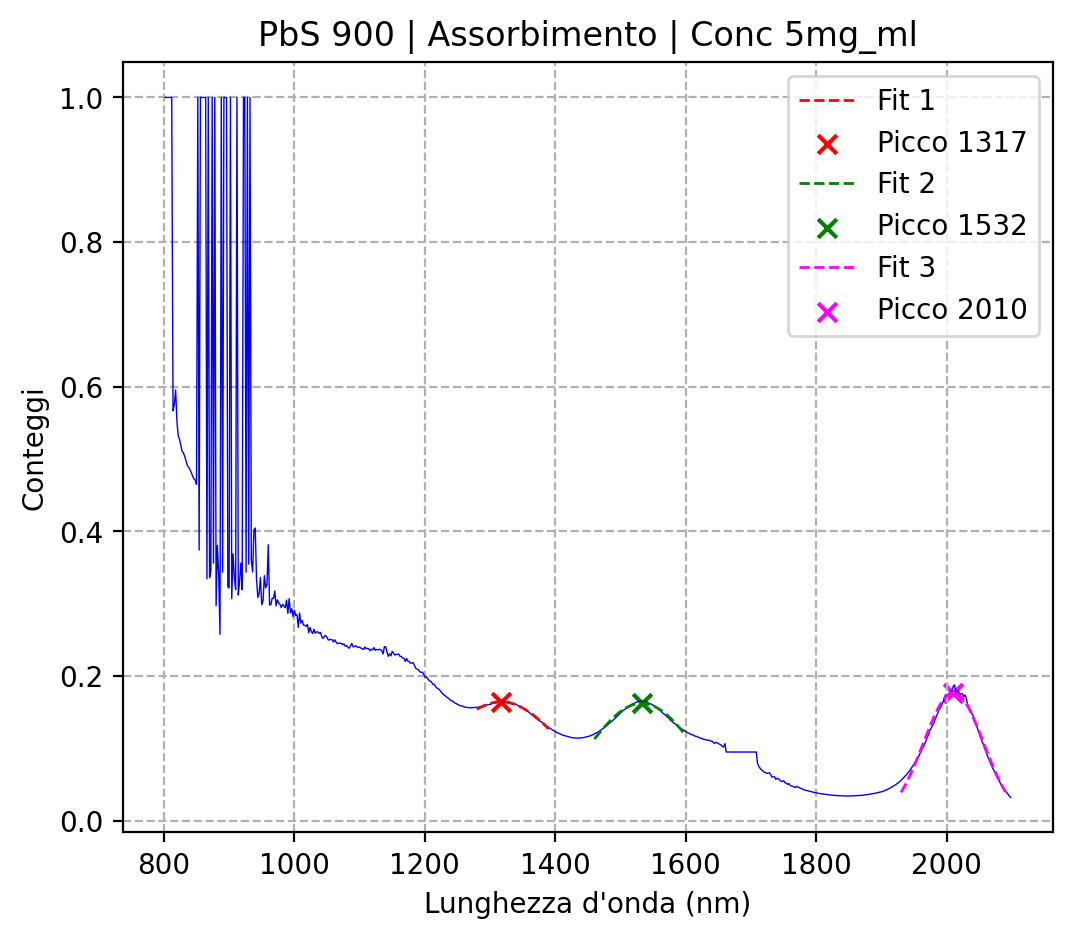

In [ ]:
for i, conc in enumerate(concentrazioni):
    
    ## PULIZIA DEI COUNTS ##
    waveln = PbS_T[conc][0].copy()
    counts = PbS_T[conc][1].copy()
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum
    
    # isolo regione incriminata
    mask = (waveln > 1660) & (waveln < 1710)
    indici = np.where(mask)[0] # indici della maschera 
    # pongo tutti gli elementi in questa regione uguali a un valore fisso
    counts[indici] = oplà[i]
    # isolo plot 800 < x < 2100?
    mask = (waveln > 800) & (waveln < 2100)
    waveln = waveln[mask]
    counts = counts[mask]
    
    ### PLOT E FIT ###

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)
    
    ## UN FIT PER CIASCUNA REGIONE ##
    for j, regione in enumerate(regioni):
        # isolo regione
        mask = (waveln > regione[0]) & (waveln < regione[1])
        x_fit = waveln[mask]
        y_fit = counts[mask]
    
        # imposto parametri: ogni entrata è una tripla (a, mu, sigma)
        punto_medio = (regione[0] + regione[1]) / 2
        params = np.array([0.03, punto_medio, 60])
        
        # Set dei bounds per i parametri
        low = [0.0001, regione[0], 10]   # Limiti inferiori 
        upp = [1, regione[1], 200]       # Limiti superiori
    
        popt, pcov = curve_fit(gaussiana, x_fit, y_fit, p0=params, bounds=(low,upp))
        
        ## PLOT CURVA FIT ##
        x_plot = np.linspace(regione[0], regione[1], 200)
        y_plot = gaussiana(x_plot, *popt)
        plt.plot(x_plot, y_plot, linestyle='--', color=col[j], label=f"Fit {j+1}", linewidth=1)#, zorder=2)
    
        # plotto anche i picchi individuati dal fit
        x_picco = popt[1]
        y_picco = gaussiana(x_picco, *popt)
        plt.scatter(x_picco, y_picco, 
                    color=col[j], marker='x',
                    label=f'Picco {x_picco:.0f}', s=45)
       
        ## CALCOLO CHI2 ##
        chi2, dof = chi2_gaussiana(x_fit, y_fit, popt)
        
        ## PRINT RISULTATI FIT ##
        print('• Gaussiana ', j+1)
        print(' - A =', popt[0])
        print(' - mu =', popt[1])
        print(' - sigma =', popt[2])
        print(' - chi2rid =', chi2/dof)

    ## OPZIONI GRAFICHE ##
    plt.title(r'PbS 2000 | Assorbimento | Conc ' +  conc)
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    #plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()

Quest'ultimo dovrebbe essere l'unico attendibile: l'unico senza picco troncato. La forma a cavatappi dei picchi potrebbe essere causato da saturazione del segnale?

## L'ultimo (Conc 5mg_ml) ma ristretto e poi in eV 

### Preparazione dei dati

In [ ]:
help1 = PbS_T['5mg_ml'][0].copy()
help2 = PbS_T['5mg_ml'][1].copy()

# normalizzo i counts
maximum = np.max(counts)
counts = counts / maximum

# isolo regione incriminata
incriminata_bool = (help1 > 1660) & (help1 < 1710)
incriminata = np.where(incriminata_bool)[0] 
primo = incriminata[0]
ultimo = incriminata[-1]
# disegno una retta che congiunge primo e ultimo (pendenza negativa)
delta_x = help1[ultimo] - help1[primo]
delta_y = help2[primo] - help2[ultimo]
rapporto_incrementale = delta_y/delta_x # eq retta: help2[primo] - rapporto_incrementale*(help1[i]-help1[primo])

# sostituisco i valori 
for i in incriminata:
    help2[i] = help2[primo] - rapporto_incrementale*(help1[i]-help1[primo])
    
# prima di tutto seleziono solo la regione >1200nm
mask_1200 = (help1 > 1200) & (help1 < 2100)
waveln = help1[mask_1200]
counts = help2[mask_1200]

# converto i nm in eV
energy = lambda_to_E(waveln)

### Plot ristretto in nm

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_47135/3904370712.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


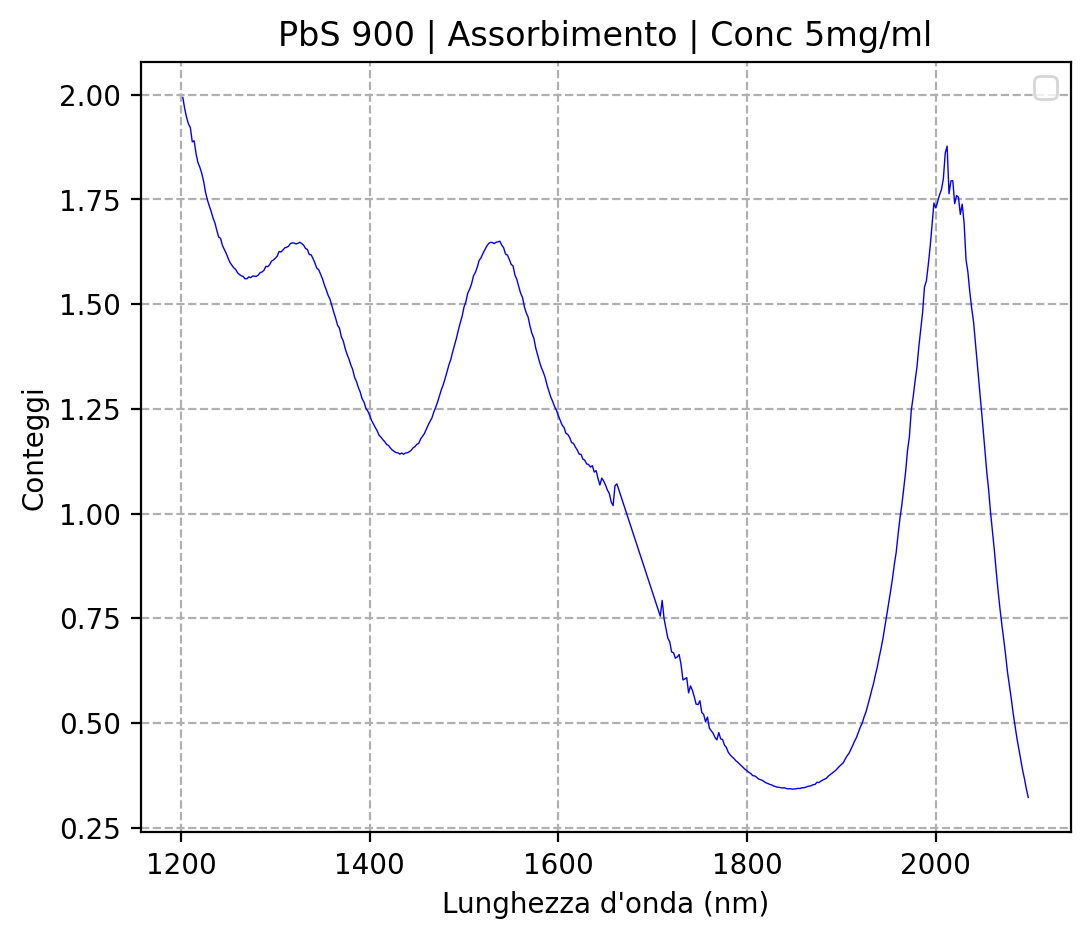

In [ ]:
# Plot
plt.figure(figsize=(6,5), dpi=200)
plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)

## OPZIONI GRAFICHE ##
plt.title(r'PbS 900 | Assorbimento | Conc 5mg/ml')
plt.xlabel("Lunghezza d'onda (nm)")
plt.ylabel("Conteggi")
#plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
#plt.tight_layout()
plt.show()

### Plot ristretto in eV

• Gaussiana  1 [eV]
 - A = 1.7961212527617745
 - mu = 0.6166483904749479
 - sigma = 0.01345574988764567  | FWHM = 0.03542898945417105
 - Area = 0.06058058905345459
• Gaussiana  2 [eV]
 - A = 1.6424216227859882
 - mu = 0.809471288390332
 - sigma = 0.039706777013362185  | FWHM = 0.10454794387618263
 - Area = 0.16347043755869975
• Gaussiana  3 [eV]
 - A = 1.6463983585520292
 - mu = 0.9394992207750693
 - sigma = 0.0653904504422562  | FWHM = 0.1721730560144606
 - Area = 0.269860417313446


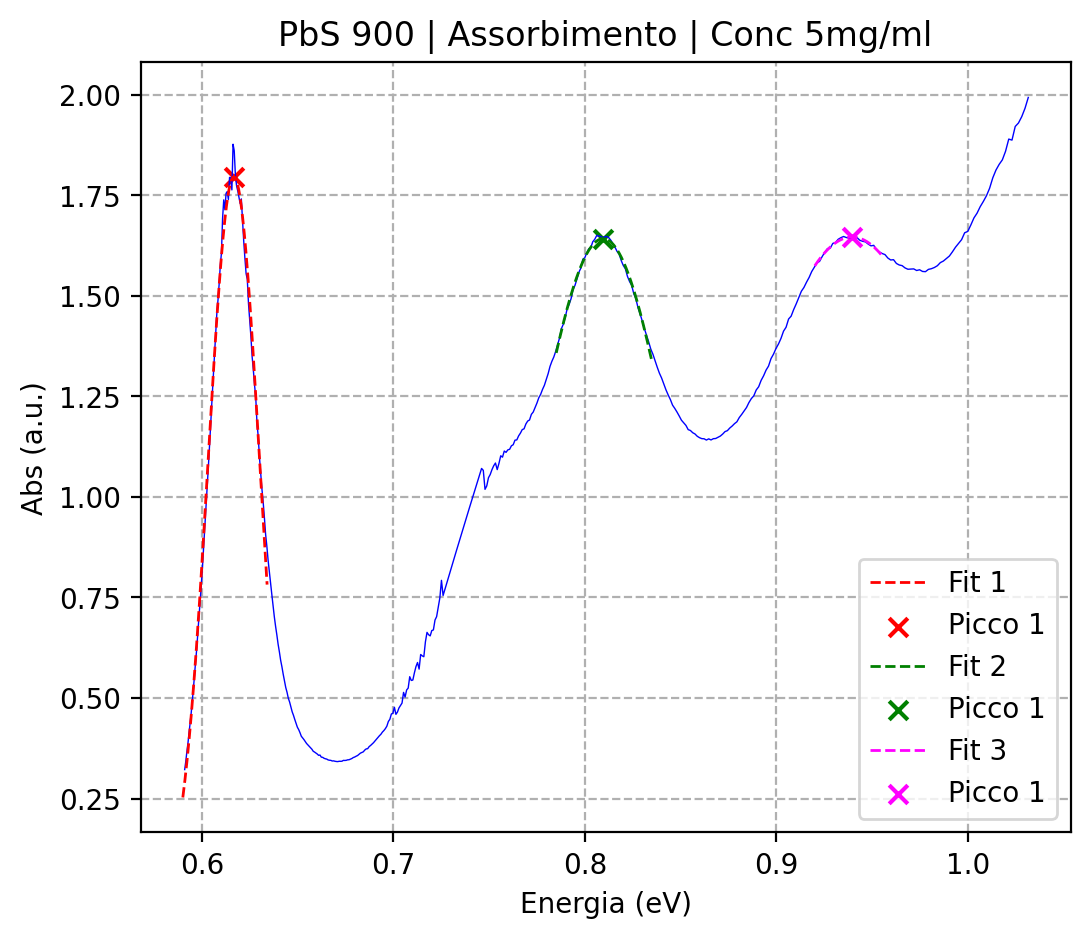

In [ ]:
# Plot
plt.figure(figsize=(6,5), dpi=200)
plt.plot(energy, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)

## FIT ##
regioni = [
    (0.59, 0.634),
    (0.785, 0.835),
    (0.92, 0.956)
]

for j, regione in enumerate(regioni):
    mask_regione = (energy > regione[0]) & (energy < regione[1])
    x_fit_reg = energy[mask_regione]
    y_fit_reg = counts[mask_regione]
    
    # imposto parametri: ogni entrata è una tripla (a, mu, sigma)
    punto_medio = (regione[0] + regione[1]) / 2
    params = np.array([0.03, punto_medio, 0.1])
    
    # Set dei bounds per i parametri
    low = [0.0001, regione[0], 0.001]   # Limiti inferiori 
    upp = [np.inf, regione[1], 2]       # Limiti superiori

    popt, pcov = curve_fit(gaussiana, x_fit_reg, y_fit_reg, p0=params, bounds=(low,upp))
    
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(regione[0], regione[1], 200)
    y_plot = gaussiana(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color=col[j], label=f"Fit {j+1}", linewidth=1)#, zorder=2)

    # plotto anche i picchi individuati dal fit
    x_picco = popt[1]
    y_picco = gaussiana(x_picco, *popt)
    plt.scatter(x_picco, y_picco, 
                color=col[j], marker='x',
                label=f'Picco {x_picco:.0f}', s=45)
    
    ## PRINT RISULTATI FIT ##
    print('• Gaussiana ', j+1, '[eV]')
    print(' - A =', popt[0])
    print(' - mu =', popt[1])
    print(' - sigma =', popt[2], ' | FWHM =', popt[2]*2.633)
    print(' - Area =', popt[0]*popt[2]*np.sqrt(2*np.pi))
    

## OPZIONI GRAFICHE ##
plt.title(r'PbS 900 | Assorbimento | Conc 5mg/ml')
plt.xlabel("Energia (eV)")
plt.ylabel("Abs (a.u.)")
#plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
#plt.tight_layout()
plt.show()